## Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Leitura do arquivo de treinamento

In [2]:
train = pd.read_csv('train.csv')
train = train.set_index('Id')
y_train = train['median_house_value']

In [3]:
train.head() #mostra os 5 primeiros itens do meu datastet

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
Id,,,,,,,,,
15817,-120.85,37.57,27,819,157,451,150,34934,193800
6236,-117.74,34.06,48,2438,599,1508,548,28983,129200
19262,-118.11,33.92,32,1016,190,729,177,43000,151300
19743,-118.12,34.15,35,1760,447,984,384,34167,198200
7272,-120.63,37.41,27,2083,444,1462,479,26439,69100


In [4]:
train.tail() #mostra os 5 ultimos itens do meu dataset

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
Id,,,,,,,,,
7044,-117.21,32.75,15,1716,702,914,672,10612,300000
10154,-121.18,38.78,13,3480,528,1432,532,61642,277800
12871,-121.33,38.65,23,2446,523,1132,513,26266,198500
7182,-118.37,34.02,44,1944,458,981,377,26154,193200
9756,-117.95,34.04,36,1044,200,982,205,47679,153900


In [5]:
train.describe()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.563050,35.625804,28.700028,2622.627284,535.628391,1413.978405,496.934109,38747.577450,207556.603267
std,2.008096,2.138690,12.587508,2145.423570,416.800426,1095.060629,376.873380,19091.513037,116441.436255
min,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,4999.000000,14999.000000
25%,-121.790000,33.930000,18.000000,1444.000000,295.000000,784.000000,279.000000,25596.500000,119300.000000
50%,-118.490000,34.250000,29.000000,2116.000000,432.000000,1160.000000,407.000000,35334.000000,179950.000000
75%,-118.000000,37.710000,37.000000,3131.250000,645.250000,1705.000000,602.000000,47500.000000,266100.000000
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,150001.000000,500001.000000


In [6]:
train.shape

(14448, 9)

Nosso arquivo possui 14488 entradas nao nulas com 8 features e 1 target.

In [7]:
train.columns[:-1]

Index(['longitude', 'latitude', 'median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income'],
      dtype='object')

Essas são as features do meu dataset

## Visualização de dados

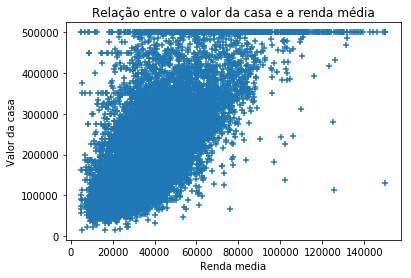

In [8]:
plt.scatter(train['median_income'], y_train, marker = '+')
plt.ylabel('Valor da casa')
plt.xlabel('Renda media')
plt.title('Relação entre o valor da casa e a renda média')
plt.show()

Pelo gráfico, percebe-se que há uma certa relação entre a renda média e o preço da residência.

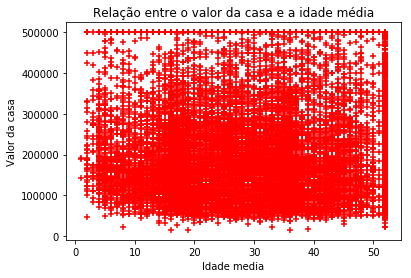

In [9]:
plt.scatter(train['median_age'], y_train, marker = '+', color = 'r')
plt.ylabel('Valor da casa')
plt.xlabel('Idade media')
plt.title('Relação entre o valor da casa e a idade média')
plt.show()

Pelo gráfico, não é possível ver uma relação clara entre a idade média e o valor da casa.

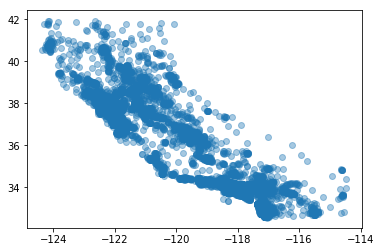

In [10]:
plt.scatter(x=train['longitude'], y=train['latitude'], alpha = 0.4)
plt.show()

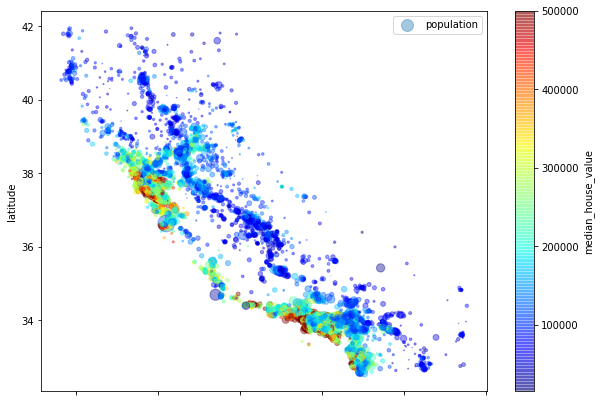

In [11]:
train.plot(kind ='scatter', x = 'longitude', y = 'latitude', s = train['population']/100, label = 'population',
           c = 'median_house_value', cmap=plt.get_cmap("jet"), colorbar=True, alpha = 0.4, figsize = (10, 7))
plt.legend()
plt.show()

É possível perceber uma relação entre a posição geográfica (proximidade a costa) e o valor das casas. (http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/)

In [12]:
import scipy.stats as st

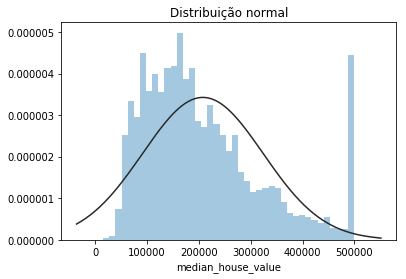

In [13]:
plt.title('Distribuição normal')
sns.distplot(y_train, kde=False, fit = st.norm)
plt.show()

Percebe-se que os dados não seguem uma distribuição normal.

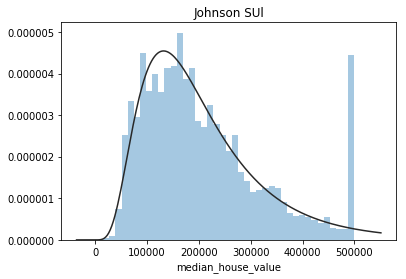

In [14]:
plt.title('Johnson SUl')
sns.distplot(y_train, kde = False, fit = st.johnsonsu)
plt.show()

Porém, ela segue uma distribuição de Johnson SU, uma transformação da transformação normal. https://en.wikipedia.org/wiki/Johnson%27s_SU-distribution

## Análise dos dados

In [15]:
corr = train.corr()
corr.head()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924038,-0.108722,0.039412,0.061997,0.091558,0.046091,-0.014650,-0.044062
latitude,-0.924038,1.000000,0.014320,-0.033607,-0.062063,-0.104018,-0.065010,-0.083089,-0.147024
median_age,-0.108722,0.014320,1.000000,-0.363453,-0.320720,-0.300629,-0.302986,-0.125571,0.099341
total_rooms,0.039412,-0.033607,-0.363453,1.000000,0.927056,0.859914,0.913999,0.199281,0.139242
total_bedrooms,0.061997,-0.062063,-0.320720,0.927056,1.000000,0.881080,0.978051,-0.009742,0.055533


In [16]:
corr['median_house_value'].sort_values()

latitude             -0.147024
longitude            -0.044062
population           -0.020434
total_bedrooms        0.055533
households            0.071622
median_age            0.099341
total_rooms           0.139242
median_income         0.687604
median_house_value    1.000000
Name: median_house_value, dtype: float64

Nenhuma coluna apresenta uma correlacao muito alta com median_house_value com median_house_value.

In [17]:
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

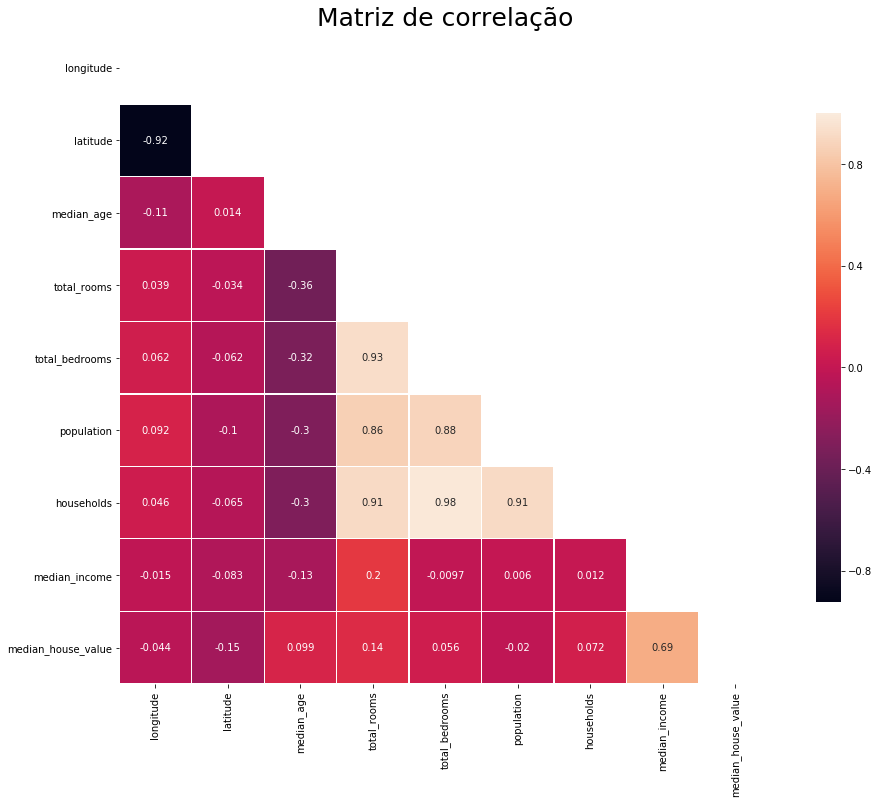

In [18]:
fig, axis = plt.subplots(figsize=(16, 12))
plt.title('Matriz de correlação',fontsize=25)

sns.heatmap(corr,linewidths=0.25,vmax=1.0,square=True, 
            linecolor='w',annot=True,mask=mask,cbar_kws={"shrink": .75})
plt.show()


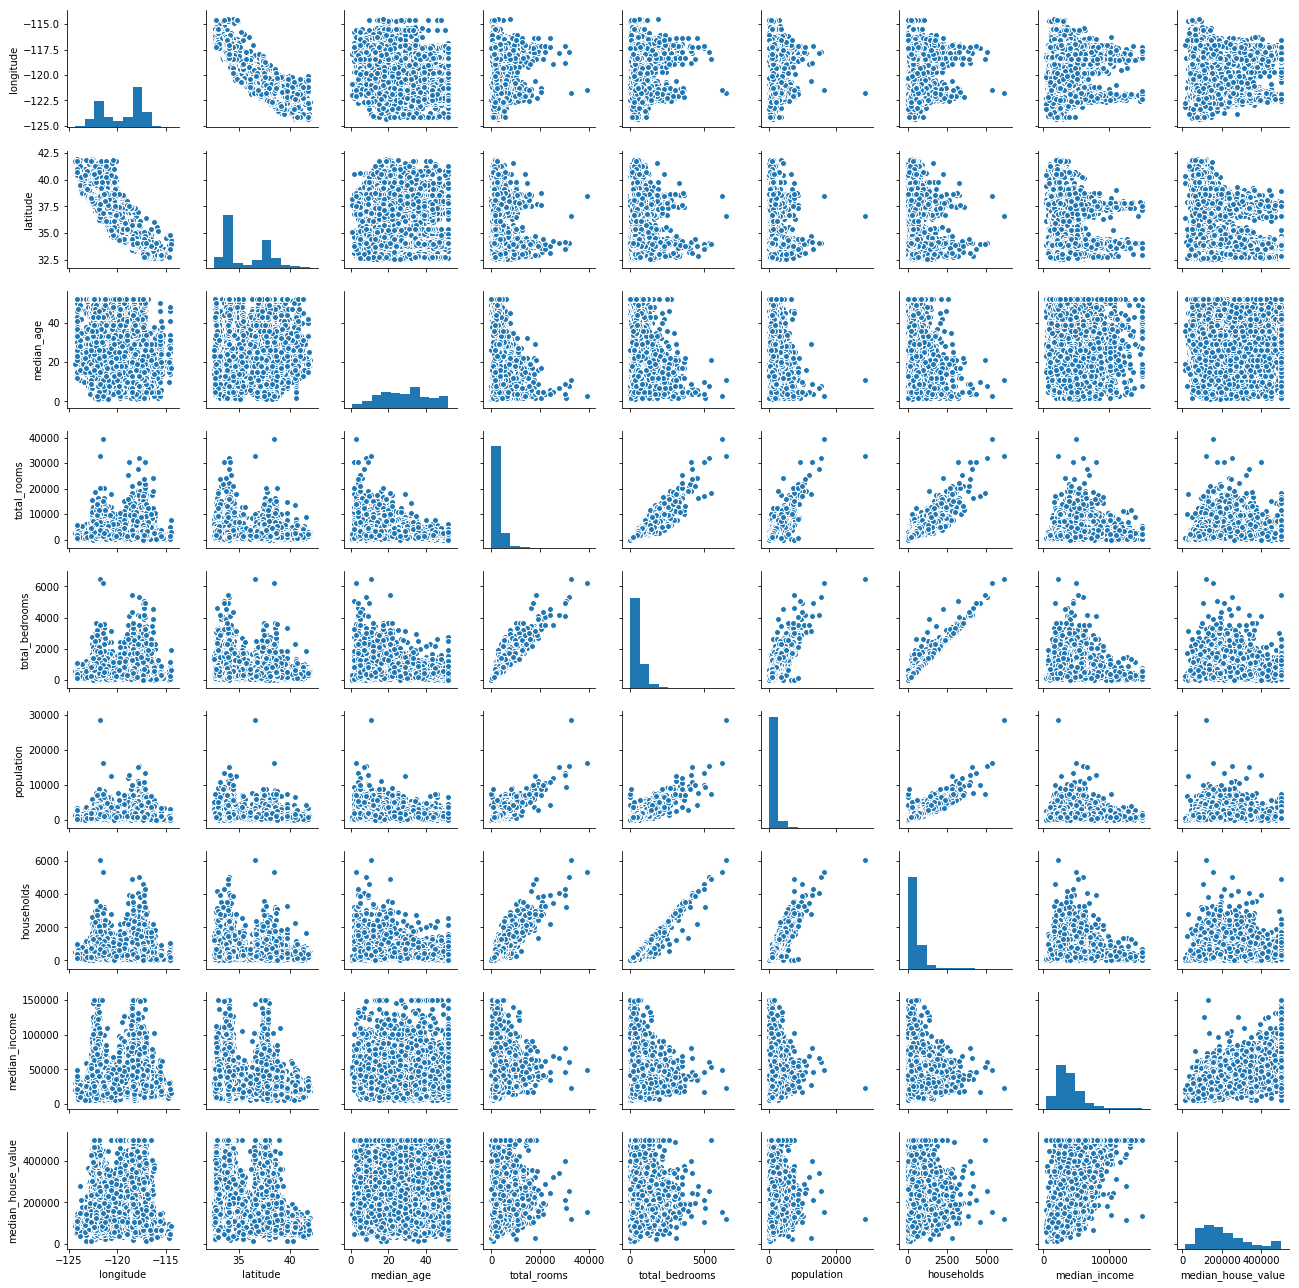

In [19]:
sns.pairplot(train, size = 2, kind = 'scatter')
plt.show()

Olhando o pairplot, percebe-se que algumas variáveis são bem relacionadas:
    - total bedrooms e households
    - total bedrooms e total rooms
    - population e total rooms
    - population e households
    - total rooms e households
    - latitude e longitude

Entre essas variáveis mais correlacionadas, posso fazer um scatter plot.

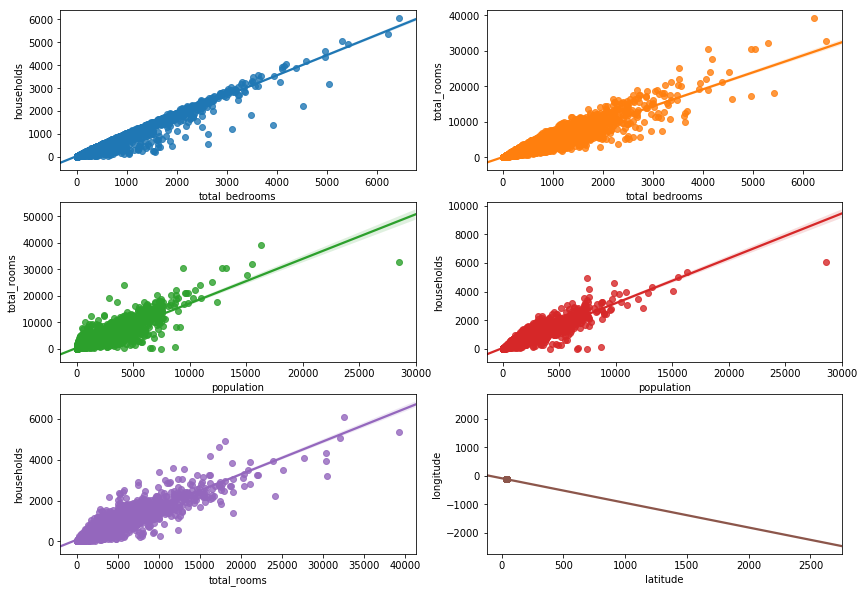

In [20]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
sns.regplot(x = train['total_bedrooms'], y=train['households'], scatter = True, fit_reg = True, ax = ax1)
sns.regplot(x = train['total_bedrooms'], y=train['total_rooms'], scatter = True, fit_reg = True, ax = ax2)
sns.regplot(x = train['population'], y=train['total_rooms'], scatter = True, fit_reg = True, ax = ax3)
sns.regplot(x = train['population'], y=train['households'], scatter = True, fit_reg = True, ax = ax4)
sns.regplot(x = train['total_rooms'], y=train['households'], scatter = True, fit_reg = True, ax = ax5)
sns.regplot(x = train['latitude'], y=train['longitude'], scatter = True, fit_reg = True, ax = ax6)
plt.show()

In [21]:
train.columns

Index(['longitude', 'latitude', 'median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value'],
      dtype='object')

In [22]:
train['income_x_pop'] = train['median_income']/train['population']
train['rooms_x_pop'] = train['total_rooms']/train['population']
train['bedrooms_x_rooms'] = train['total_bedrooms']/train['total_rooms']
train['location'] = (train['latitude'] + train['longitude']) / 2

In [23]:
train.corr()['median_house_value'].sort_values()

location             -0.492419
bedrooms_x_rooms     -0.248363
latitude             -0.147024
longitude            -0.044062
population           -0.020434
total_bedrooms        0.055533
households            0.071622
median_age            0.099341
income_x_pop          0.118843
total_rooms           0.139242
rooms_x_pop           0.204894
median_income         0.687604
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [24]:
x_train =  train[['location', 'bedrooms_x_rooms', 'income_x_pop', 'rooms_x_pop', 'median_income']]

## Treinando o meu modelo 

In [25]:
y_train = train['median_house_value']

In [26]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

### Método dos mínimos quadrados

In [27]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
cross_val_score(reg, x_train, y_train, cv = 5).mean()

0.6219433122178059

### Ridge

In [29]:
ridge = linear_model.Ridge(alpha = .5)
ridge.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
cross_val_score(ridge, x_train, y_train, cv = 5).mean()

0.6219448134049064

### Lasso

In [31]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
cross_val_score(lasso, x_train, y_train, cv = 5).mean()

0.6219433655669626

### KNN Regression

In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
for i in range(1, 31):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(x_train, y_train)
    print(i, cross_val_score(knn, x_train, y_train, cv = 5).mean())

1 -0.009550301030608277
2 0.25153581068853653
3 0.33004354508380207
4 0.3745242613938725
5 0.39477536425946125
6 0.4098090404344239
7 0.4203862173785957
8 0.4302565437527816
9 0.4378037192271865
10 0.44510872657191436
11 0.44823606989875653
12 0.4523929851201638
13 0.45609215441738177
14 0.4580104734464182
15 0.45984161296510695
16 0.4612663551146804
17 0.4635054306613807
18 0.4650344987220324
19 0.4667067284512389
20 0.46757565717931804
21 0.46886456881402727
22 0.4696148416848125
23 0.4704684208035214
24 0.4708647755324442
25 0.47201313212452883
26 0.4732743007080137
27 0.47350081111019104
28 0.4740839878247794
29 0.47450206850377424
30 0.4751913496630157


In [27]:
from xgboost import XGBRegressor

In [32]:
model = XGBRegressor()

In [33]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [34]:
cross_val_score(model, x_train, y_train, cv = 5)

array([0.74069142, 0.73344228, 0.73461109, 0.73862398, 0.73584957])

## Predição banco de testes 

O melhor modelo foi o de Ridge, que será usado para fazer as predições no banco de testes.

In [37]:
test = pd.read_csv('test.csv')
submit = pd.read_csv('sample_sub_1.csv')

In [38]:
test['income_x_pop'] = test['median_income']/test['population']
test['rooms_x_pop'] = test['total_rooms']/test['population']
test['bedrooms_x_rooms'] = test['total_bedrooms']/test['total_rooms']
test['location'] = (test['latitude'] + test['longitude']) / 2

In [39]:
x_test = test[['location', 'bedrooms_x_rooms', 'income_x_pop', 'rooms_x_pop', 'median_income']]

In [40]:
predict = model.predict(x_test)

In [44]:
submit['median_house_value'] = np.abs(predict)
submit = submit.set_index('Id')

In [42]:
submit.head()

,Id,median_house_value
0,8609,413183.312500
1,14610,128688.101562
2,1557,101109.953125
3,12875,106186.609375
4,17821,148767.468750


In [45]:
submit.to_csv('submission_2.csv')